In [29]:
import numpy as np
import pandas as pd
#import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from skimage.transform import resize
from skimage.io import imread
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
Categories=['NORMAL','PNEUMONIA']

In [7]:
def load_image(datadir, Categories):

    flat_data_arr=[]
    target_arr=[]

    for i in Categories:

        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(150,150,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
        print(f'loaded category:{i} successfully')

    flat_data=np.array(flat_data_arr)
    target=np.array(target_arr)

    df=pd.DataFrame(flat_data)
    df['Target']=target

    x=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    return x, y

In [8]:
datadir = 'D:/github/archive/chest_xray/train'
X, y = load_image(datadir, Categories)


loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [9]:
datadir2 = 'D:/github/archive/chest_xray/test'
X_test2, y_test2 = load_image(datadir2, Categories)

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:

decision_tree = tree.DecisionTreeClassifier()

In [12]:

decision_tree.fit(X_train, y_train)

print("Decision Tree Accuracy Score: ", decision_tree.score(X_test, y_test))


Decision Tree Accuracy Score:  0.8869009584664537


[Text(0.6329352094240838, 0.9852941176470589, 'x[66150] <= 0.0\ngini = 0.377\nsamples = 3651\nvalue = [921, 2730]'),
 Text(0.3931609947643979, 0.9558823529411765, 'x[210] <= 0.771\ngini = 0.496\nsamples = 1400\nvalue = [760, 640]'),
 Text(0.15903141361256545, 0.9264705882352942, 'x[766] <= 0.102\ngini = 0.452\nsamples = 802\nvalue = [277, 525]'),
 Text(0.020942408376963352, 0.8970588235294118, 'x[62625] <= 0.464\ngini = 0.245\nsamples = 105\nvalue = [90, 15]'),
 Text(0.010471204188481676, 0.8676470588235294, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.031413612565445025, 0.8676470588235294, 'x[31205] <= 0.527\ngini = 0.134\nsamples = 97\nvalue = [90, 7]'),
 Text(0.020942408376963352, 0.8382352941176471, 'x[47563] <= 0.291\ngini = 0.081\nsamples = 94\nvalue = [90, 4]'),
 Text(0.010471204188481676, 0.8088235294117647, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.031413612565445025, 0.8088235294117647, 'x[7570] <= 0.142\ngini = 0.043\nsamples = 92\nvalue = [90, 2]'),
 Text(

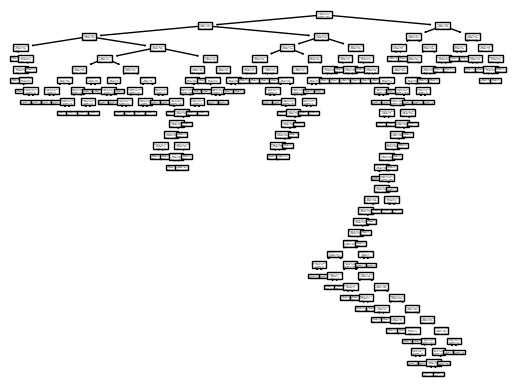

In [14]:
tree.plot_tree(decision_tree)

In [13]:
print("Decision Tree Accuracy Score using test data: ", decision_tree.score(X_test2, y_test2))

Decision Tree Accuracy Score using test data:  0.7435897435897436


In [21]:
y_pred = decision_tree.predict(X_test)
y_pred2 = decision_tree.predict(X_test2)

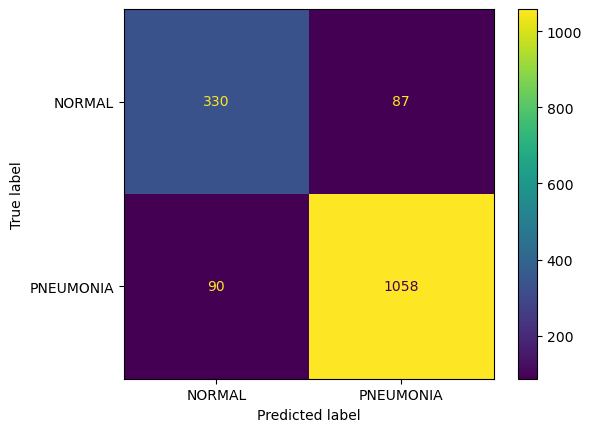

In [32]:
cm1 = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=Categories).plot()

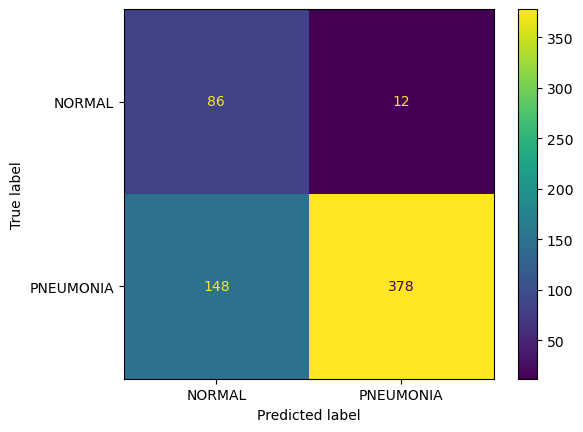

In [33]:
cm2 = confusion_matrix(y_pred2, y_test2)
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=Categories).plot()

In [35]:
print(classification_report(y_test, y_pred, target_names=Categories))

              precision    recall  f1-score   support

      NORMAL       0.79      0.79      0.79       420
   PNEUMONIA       0.92      0.92      0.92      1145

    accuracy                           0.89      1565
   macro avg       0.86      0.85      0.86      1565
weighted avg       0.89      0.89      0.89      1565



In [36]:
print(classification_report(y_test2, y_pred2, target_names=Categories))

              precision    recall  f1-score   support

      NORMAL       0.88      0.37      0.52       234
   PNEUMONIA       0.72      0.97      0.83       390

    accuracy                           0.74       624
   macro avg       0.80      0.67      0.67       624
weighted avg       0.78      0.74      0.71       624

